# ECE 4950 Assignment 5 

## Coding (Support Vector Machines): Digit classification using SVM 

We consider hand written digit recognition, MNIST. Please visit http://yann.lecun.com/exdb/mnist/ for more information about the original MNIST dataset.

In this competition, you will be given images of hand written digits. Each image is grayscale, and 28 by 28 pixels. Your goal is to design a classifier for this problem (output digits from 0 to 9).

Make sure you have installed the package scikit-image:

``
    pip3 install scikit-image
``

or 


``
    conda install scikit-image
``

You can use the following script to load data.

In [1]:
%matplotlib inline
from scipy.io import loadmat
import numpy as np
data_path = "./mnist.mat"
data_raw = loadmat(data_path)
images = data_raw['data'].T
label = data_raw['label'][0]

Data will be an array of 70000 784-length numpy arrays. 50000 of them will be the training data and 20000 of them will be the testing data. The corresponding labels of training data are also provided. 

Each vector represents an image of size $28 \times 28$. The original black and white images were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field. 

You can reshape each vector to be an $28 \times 28$ matrix and plot the image using the following script. Typical images will look like the following:

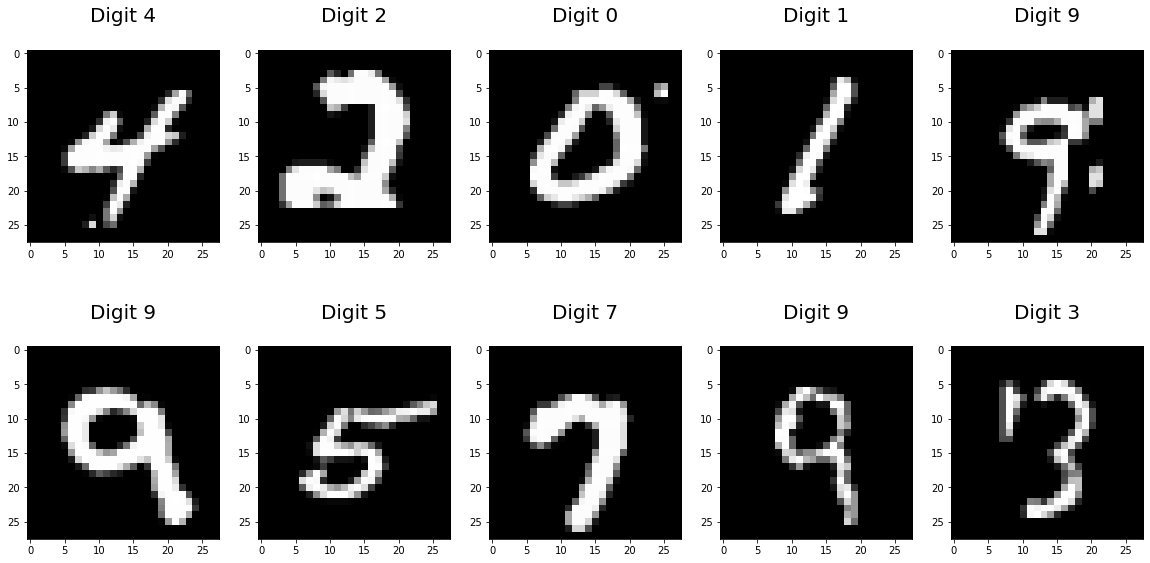

In [2]:
import matplotlib.pyplot as plt
import random
plt.figure(figsize=(20,10))
for i in range(10,20):
    plt.subplot(2, 5, i-9)
    t = random.randint(0,70000)
    plt.imshow(np.reshape(images[t,:], (28,28)), cmap = plt.cm.gray)
    plt.title('Digit %i\n' %label[t], fontsize = 20)

### Sampling, Normalization and Data splitting

To make training faster, we only take 10% of the data randomly. Then we further reduce the dimension of the data by taking the average of each  Then we split the data into training and testing set and normalize them by max norm.

In [3]:
from sklearn.model_selection import train_test_split
X_new, X_unused, Y_new, Y_unused = train_test_split(images, label, test_size = 0.9, random_state = 1000)
X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_new, Y_new, test_size = 0.3, random_state = 1000) # split the dataset into training and testing sets
X_trn = X_trn/256
X_tst = X_tst/256

### Image Rescaling
To make the training even faster. The next code block rescale all the images by reducing the height and width of the image both by half. We make each $2\time 2$ block in the orginal image into a single pixel in the new image. The resulting value of the pixels in the new image will be the average of the original four pixels.

Then we get new images with $14 \times 14$ in size and stores in the rows of X_trn_new and X_tst_new.

In [4]:
from skimage.transform import rescale, resize, downscale_local_mean
m, n = X_trn.shape
n_new = n//4
X_trn_new = np.zeros((m,n_new))
for i in range(m):
    image = np.reshape(X_trn[i,:], (28,28))
    image_rescaled = rescale(image, 1.0 / 2.0, anti_aliasing=False)
    X_trn_new[i,:] = np.reshape(image_rescaled, n_new)

m2 = X_tst.shape[0]
X_tst_new = np.zeros((m2,n_new))
for i in range(m2):
    image = np.reshape(X_tst[i,:], (28,28))
    image_rescaled = rescale(image, 1.0 / 2.0, anti_aliasing=False)
    X_tst_new[i,:] = np.reshape(image_rescaled, n_new)
    
print('The new training set has size: '+ str(X_trn_new.shape))
print('The new testing set has size: '+ str(X_tst_new.shape))


The new training set has size: (4900, 196)
The new testing set has size: (2100, 196)


## 1. Linear SVM
Run a linear SVM for the penalty parameter $$C \in \{2^i: i = 0, 1, ..., 19\}$$, and plot the training and testing accuracy as a function of $log C$ (semi-log plot).

Explain how the accuracy changes with repect to penalty parameter $C$ (describe the underfitting and overfitting phenomenon). 

What is the maximum testing accruracy achieved among all penalty parameters for linear SVM?

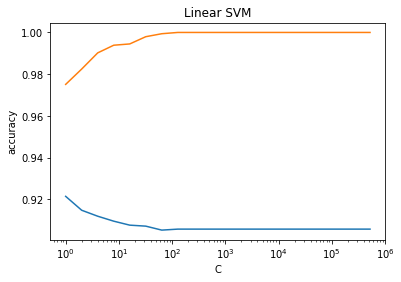

The maximum testing accuracy achieved with Linear SVM is: 0.9214285714285715


In [5]:
from sklearn.svm import SVC
from sklearn.metrics import hamming_loss
n = np.array(range(20))
C = 2**n
accuracy_tst = []
accuracy_trn = []
#========Your Code Here============
for i in C:
    clf = SVC(C=i,kernel="linear")
    clf.fit(X_trn_new, Y_trn)
    trn_pred = clf.predict(X_trn_new)
    tst_pred = clf.predict(X_tst_new)
    accuracy_trn.append(1.0-hamming_loss(Y_trn,trn_pred))
    accuracy_tst.append(1.0-hamming_loss(Y_tst,tst_pred)) 

max_acc = max(accuracy_tst)
#=============================
plt.semilogx(C, accuracy_tst)
plt.semilogx(C, accuracy_trn)
plt.title("Linear SVM")
plt.xlabel('C')
plt.ylabel('accuracy')
plt.show()
print('The maximum testing accuracy achieved with Linear SVM is: ' + str(max_acc))


# <font color='blue'> Explanation for Problem 1 </font> #
## Training Accuracy ##
<font color='blue'> For the training accuracy, as we increase the parameter C, the regularization strength decreases, since C is the inverse of the regularization strength. The training accuracy increases as we decrease the regularization strength, converging to an accuracy near 100% at a C value of 10^2. The model becomes more and more overfitted. Since the model was trained on the training set and tested on the training set as well, we expect the training accuracy to be high. </font> 
## Testing Accuracy ##
<font color='blue'> For the testing accuracy, as we increase the parameter C, the model is becoming more and more overfitted on the training set, as the regularization strength is decreasing. The model performs less well on the testing data at these higher C values, resulting in a decrease in testing accuracy. The testing accuracy flattens at a C value of 10^2, since further overfitting doesn't significantly affect the testing predictions. The maximum testing accuracy is 92.14%. </font> 

<font color='blue'>Overall, the training accuracy is expected to be higher than the testing accuracy, since the model is expected to perform better on data it has seen before.</font> 

## 2. Polynomial SVM
Run an SVM with polynomial kernal of degree $2, 3, 4$ with the penalty parameter $$C \in \{2^i: i = 0, 1, ..., 19\}$$, and plot the training and testing accuracy as a function of $log C$ (semi-log plot).

Explain how the accuracy changes with repect to penalty parameter $C$ (describe the underfitting and overfitting phenomenon). 

What is the maximum testing accruracy achieved among all penalty parameters for SVM with polynomial kernal of each degree? Compare it with linear SVM and explain.

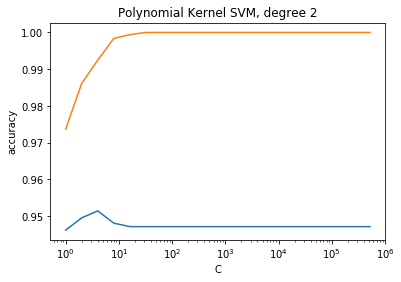

The maximum testing accuracy achieved with Polynomial Kernel SVM of degree 2 is: 0.9514285714285714


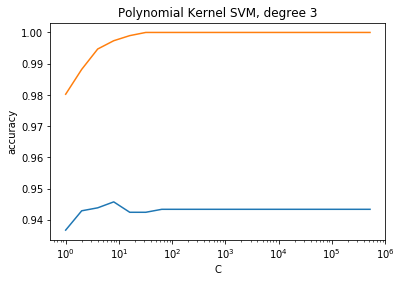

The maximum testing accuracy achieved with Polynomial Kernel SVM of degree 3 is: 0.9457142857142857


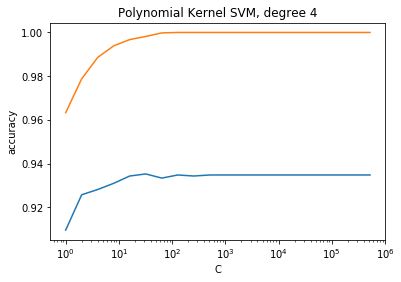

The maximum testing accuracy achieved with Polynomial Kernel SVM of degree 4 is: 0.9352380952380952


In [6]:
from sklearn.svm import SVC
D = [2, 3, 4]
n = np.array(range(20))
C = 2**n
max_acc = np.zeros(3)
for i in range(3):
    accuracy_tst = []
    accuracy_trn = []
    d = D[i]
    #========Your Code Here============
    for j in C:
        clf = SVC(C=j,kernel='poly',degree=d)
        clf.fit(X_trn_new, Y_trn)
        trn_pred = clf.predict(X_trn_new)
        tst_pred = clf.predict(X_tst_new)
        accuracy_trn.append(1.0-hamming_loss(Y_trn,trn_pred))
        accuracy_tst.append(1.0-hamming_loss(Y_tst,tst_pred)) 
    max_acc[i]=max(accuracy_tst)
    #=============================
    plt.semilogx(C, accuracy_tst)
    plt.semilogx(C, accuracy_trn)
    plt.title("Polynomial Kernel SVM, degree %i" %d)
    plt.xlabel('C')
    plt.ylabel('accuracy')
    plt.show()
    print('The maximum testing accuracy achieved with Polynomial Kernel SVM of degree ' + str(d) + ' is: ' + str(max_acc[i]))

# <font color='blue'> Explanation for Problem 2 </font> #
## <font color='blue'> Degree 2 </font>  ##

#### <font color='blue'> Training Accuracy </font>  ####
<font color='blue'> As we increase the C parameter, the training accuracy increases to a maximum accuracy of around 100%. This is the expected behavior since the model is becoming more and more overfitted and the fact that the model was trained using the training set. </font> 

#### <font color='blue'> Testing Accuracy </font>  ####
<font color='blue'> As we increase the C parameter, the testing accuracy increases to a maximum of 95.14% at a C value of around 4. Beyond this optimal C value, the testing accuracy decreases, as the model becomes more and more overfitted on the training set. </font> 

## <font color='blue'> Degree 3 </font>  ##

#### <font color='blue'> Training Accuracy  </font>  ####
<font color='blue'> As we increase the C parameter, the training accuracy increases to a maximum accuracy of around 100%. This is the expected behavior as the model is becoming more and more overfitted on the training set. </font> 
#### <font color='blue'> Testing Accuracy  </font>  ####
<font color='blue'> As we increase the C parameter, the testing accuracy increases to a maximum accuracy of 94.57% at a C value of around 8. Then, it starts to decline, before jumping back up slightly at a value of 50. After, the testing accuracy flattens. Between a C value of 20 and 50, the increase in overfitting actually improves accuracy slightly, however, not by too much. </font> 

## <font color='blue'> Degree 4 </font> ##
    
#### <font color='blue'> Training Accuracy </font>  ####
<font color='blue'> Like before, the training accuracy approaches 100% as we increase C.</font> 
#### <font color='blue'> Testing Accuracy </font>  ####
<font color='blue'> As we increase C, the testing accuracy increases to a maximum accuracy of 93.5% at a C value of 20. After, the testing accuracy oscillates slightly, before converging. The converged accuracy seems quite close to the maximum accuracy, implying that further overfitting doesn't seem to affect the predictions too much. </font> 

## <font color='blue'> Comparison with Linear SVM </font> ##
<font color='blue'> It seems like the addition of a polynomial kernel improves the testing accuracy. The maximum testing accuracy for d = 2, 3, 4 are 95.14%, 94.57%, and 93.5% respectively. The maximum testing accuracy for the linear model is 92.14%. A likely explanation is that by using the polynomial kernel, the model is able to classify the testing set better at a higher dimension, compared to the linear case. However, as we increase the dimensionality of the polynomial, we are getting slightly decreased performance as the model becomes more overfitted. </font>

## 3. SVM with Gaussian Kernal.
Run an SVM with Gaussian kernal with the penalty parameter $$C \in \{2^i: i = 0, 1, ..., 19\}$$, and plot the training and testing accuracy as a function of $log C$ (semi-log plot).

Explain how the accuracy changes with repect to penalty parameter $C$ (describe the underfitting and overfitting phenomenon). 

What is the maximum testing accruracy achieved among all penalty parameters for SVM with Gaussian kernal of each degree? Compare it with linear SVM and polynomial SVM and explain.

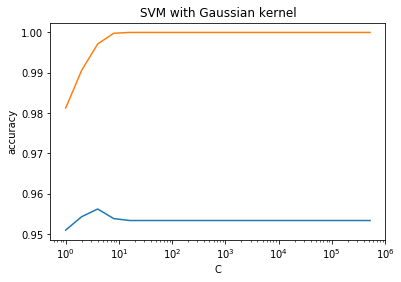

The maximum testing accuracy achieved with SVM with Gaussian kernel is: 0.9561904761904761


In [7]:
from sklearn.svm import SVC
accuracy_tst = []
accuracy_trn = []
n = np.array(range(20))
C = 2**n
#========Your Code Here============
for i in C:
    clf = SVC(C=i,kernel='rbf',gamma='scale')
    clf.fit(X_trn_new, Y_trn)
    trn_pred = clf.predict(X_trn_new)
    tst_pred = clf.predict(X_tst_new)
    accuracy_trn.append(1.0-hamming_loss(Y_trn,trn_pred))
    accuracy_tst.append(1.0-hamming_loss(Y_tst,tst_pred)) 

max_acc = max(accuracy_tst)
#=============================
plt.semilogx(C, accuracy_tst)
plt.semilogx(C, accuracy_trn)
plt.title("SVM with Gaussian kernel")
plt.xlabel('C')
plt.ylabel('accuracy')
plt.show()
print('The maximum testing accuracy achieved with SVM with Gaussian kernel is: ' + str(max_acc))

# <font color='blue'> Explanation for Problem 3 </font> #
## Training Accuracy ##
<font color='blue'>As we increase the C parameter, the training accuracy increases to 100% as the model becomes more overfitted on the training set.</font> 
## Testing Accuracy ##
<font color='blue'>As we increase the C parameter, the testing accuracy increases to a maximum value of 95.619% at a C value of around 4. Beyond this optimal C value, the testing accuracy decreases and flattens as the model becomes more and more overfitted on the training set.</font>  

<font color='blue'>Compared to the Linear Model and the Polynomial kernels of all degrees, the Gaussian kernel performs better as its accuracy is higher. I think that it performs the best because it is homogeneous (depends on the magnitude of relative distance between elements) and the fact that it is very smooth. It gives good separation in higher-dimensional space and has good generalization.</font> 